In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Computing integrals with Motecarlo methods

This exercise show two approaches to compute integrals using Montecarlo algorithms.
The first is based on the **uniform sample average** of the function that you want to integrate, and the second uses **importance sampling**.



## 1 - Start by writing and plotting the function

Here we focus on the gaussian function:

\begin{equation}
f(x) = e^{-x^2}
\end{equation}

Write it in a python function..

In [5]:
def gauss_func(x):
  return np.exp(-x**2)

.. and plot it in $[0,4]$

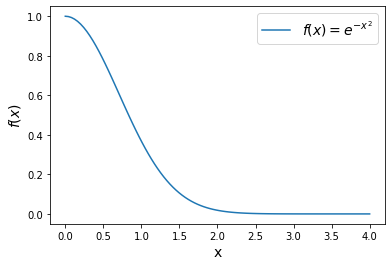

In [6]:
low_bound, up_bound = 0,4

plt.xlabel("x",fontsize=14)
plt.ylabel(r"$f(x)$",fontsize=14)

x = np.linspace(low_bound, up_bound,100)
plt.plot(x, gauss_func(x), label=r'$f(x) = e^{-x^2}$')

plt.legend(fontsize=14)

## 2 - Integral with sample average

In [ ]:
def compute_integral_by_samp_av(n_samples, low_bound, up_bound):
  x = np.random.rand(n_samples)*(up_bound - low_bound) + low_bound
  return gauss_func(x).sum() / n_samples * (up_bound - low_bound)

print("Montecarlo estimate: " + str(compute_integral_by_samp_av(100000, low_bound, up_bound)))
print("True value: " + str(np.sqrt(np.pi)/2))

Montecarlo estimate: 0.8790236566579789
True value: 0.8862269254527579


In [8]:
np.random.uniform(0,4,100)

array([3.23790073e+00, 2.98318972e+00, 1.17273372e+00, 3.79799741e+00,
       1.10580060e+00, 6.07993852e-01, 1.24284060e+00, 1.43004484e+00,
       3.32148565e+00, 6.77639114e-01, 2.60144538e+00, 9.40101252e-02,
       1.84590317e+00, 1.64596314e+00, 1.87774925e+00, 3.04529373e+00,
       9.61963575e-01, 3.84987261e+00, 2.86619222e+00, 3.79239441e+00,
       4.18770867e-01, 3.04508174e+00, 1.47330214e+00, 1.62635213e+00,
       2.52970910e+00, 1.13160214e+00, 1.63662396e+00, 6.79070480e-02,
       1.39840934e+00, 1.27814262e+00, 2.07124537e+00, 3.48315153e-03,
       1.55752628e+00, 5.26303935e-01, 8.92155811e-01, 1.61559775e+00,
       2.50749230e+00, 2.99573253e+00, 1.58081418e+00, 5.99998801e-01,
       3.31575630e+00, 2.73779560e+00, 4.22052465e-01, 1.74753769e+00,
       8.67441012e-01, 2.48211236e+00, 1.49251859e+00, 8.91706881e-01,
       2.95717425e-01, 2.08406078e+00, 1.10583948e+00, 3.64526932e+00,
       3.29717598e+00, 2.95203134e+00, 1.09179022e+00, 1.67622748e+00,
      

## 2 - Importance sampling

### 2a - Write a generator of exponentially distributed samples.


In [ ]:
def sample_exp(n_samples):
  unif_var = np.random.rand(n_samples)
  return -np.log(1 - unif_var)

n = 10000
exp_samples = sample_exp(n)

Plot the normalized histogram of $10000$ generated samples, and comare it with the exponential distribution.

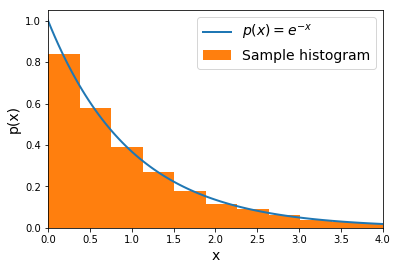

In [ ]:
plt.xlim([0,4])
plt.ylabel('p(x)', fontsize=14)
plt.xlabel('x', fontsize=14)
x = np.linspace(0,4,100)
plt.plot(x, np.exp(-x), lw=2, label=R'$p(x)=e^{-x}$')
h = plt.hist(exp_samples, bins=25, density=True, label='Sample histogram')
plt.legend(fontsize=14)

plt.savefig("exponential samples.png", dpi=200)

### 2b - Estimate the integral using importance sampling

In [ ]:
def compute_integral_exp_sampling(n_samples):
  samples = sample_exp(n_samples)
  return (gauss_func(samples) / np.exp(-samples)).sum() / n_samples

print("Importance sampling estimate: " + str(compute_integral_exp_sampling(100000)))
print("True value: " + str(np.sqrt(np.pi)/2))

Importance sampling estimate: 0.8845816579895613
True value: 0.8862269254527579


## 3 - Comparing the performance of the two methods


In [ ]:
def mean_std_of_exp_samp(n_samples, realizations):
  values = []
  for r in range(realizations):
    values.append(compute_integral_exp_sampling(n_samples))
  return np.mean(values), np.std(values)

def mean_std_of_unif_samp(n_samples, realizations):
  values = []
  for r in range(realizations):
    values.append(compute_integral_by_samp_av(n_samples, 0, 4))
  return np.mean(values), np.std(values)

In [ ]:
realizations = 100
n_list = np.linspace(1, 50000, 10, dtype=int)

mean_exp, std_exp, mean_unif, std_unif = [], [], [], []
for n in n_list:
  mean_std_exp = mean_std_of_exp_samp(n, realizations)
  mean_exp.append(mean_std_exp[0])
  std_exp.append(mean_std_exp[1])
  mean_std_unif = mean_std_of_unif_samp(n, realizations)
  mean_unif.append(mean_std_unif[0])
  std_unif.append(mean_std_unif[1])

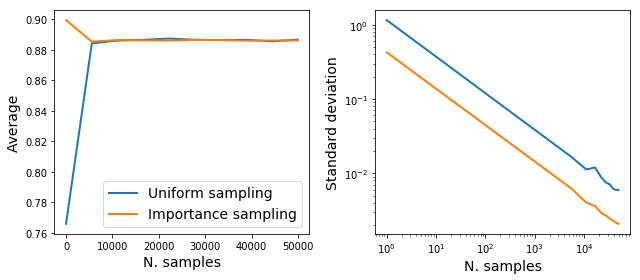

In [ ]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.xlabel('N. samples', fontsize=14)
plt.ylabel('Average', fontsize=14)
plt.plot(n_list, mean_unif, lw=2, label='Uniform sampling')
plt.plot(n_list, mean_exp, lw=2, label='Importance sampling')
plt.legend(fontsize=14)

plt.subplot(1,2,2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N. samples', fontsize=14)
plt.ylabel('Standard deviation', fontsize=14)
plt.plot(n_list, std_unif, lw=2, label='Uniform sampling')
plt.plot(n_list, std_exp, lw=2, label='Importance sampling')

plt.tight_layout()
plt.savefig("method comparison.png", dpi=200)

From the plot you can see that, to reach the same error, the importance sampling needs one order of magnitude less samples than the uniform one!

### 3b Extra - Compare also the computational time

In [ ]:
from time import time

n = 1000000

t0 = time()
result = compute_integral_by_samp_av(n, 0, 4)
print("Sample average time: " + str(time() - t0))

t0 = time()
result = compute_integral_exp_sampling(n)
print("Importance sampling time: " + str(time() - t0))

Sample average time: 0.05166959762573242
Importance sampling time: 0.08805298805236816


## 4 Extra - Evaluate the gaussian integral in a generic range of values $(a,b)$ using importance sampling.

Note that, to generate samples in $(a,b)$ (let's assume that they are greater than zero) you need a proper normalization coefficient for the exponential distribution:

$$
g(y) = \frac{e^{-y}}{e^{-a} - e^{-b}}
$$

This changes the formula to generate exponentially distributed samples from the unifom random variable...

In [ ]:
def exp_dist(x, low_bound, up_bound):
  return (np.exp(-x))/(np.exp(-low_bound) - np.exp(-up_bound))

def sample_exp(n_samples, low_bound, up_bound):
  unif_var = np.random.rand(n_samples)
  return -np.log(np.exp(-low_bound) - (np.exp(-low_bound) - np.exp(-up_bound))*unif_var)

n = 10000
low_bound, up_bound = 1,4
exp_samples = sample_exp(n, low_bound, up_bound)

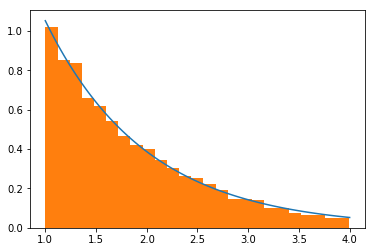

In [ ]:
#plt.xlim([0,5])
x = np.linspace(low_bound, up_bound,100)
plt.plot(x, exp_dist(x, low_bound, up_bound))
h = plt.hist(exp_samples, bins=25, density=True)

In [ ]:
def compute_integral_exp_sampling(n_samples, low_bound, up_bound):
  samples = sample_exp(n_samples, low_bound, up_bound)
  return (gauss_func(samples) / exp_dist(samples, low_bound, up_bound)).sum() / n_samples

I = compute_integral_exp_sampling(10000, low_bound, up_bound)
print("Gaussian integral from {} to {}: {}".format(low_bound, up_bound, I))

Gaussian integral from 1 to 4: 0.14162076116884267
